
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [4]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for creating static, interactive, and customized visualizations
from matplotlib import pyplot as plt # used for plotting and visualizing data
import pylab # used for integrating matplotlib plotting with numpy mathematics functionalities
import pingouin as pg # used for statistical analysis
df_mh = pd.read_csv('MillerHadenData.csv')


In [6]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
df_mh.info()


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [18]:
# Q1b (code):
# Check for missing values
missing_values = df_mh.isnull().sum()
print(missing_values)

# Check whether there is a data point for each participant on both variables
missing_abil = df_mh['Abil'].isnull().sum()
missing_iq = df_mh['IQ'].isnull().sum()

print(f"Reading Ability missing values: {missing_abil}")
print(f"IQ missing values: {missing_iq}")



Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
Reading Ability missing values: 0
IQ missing values: 0


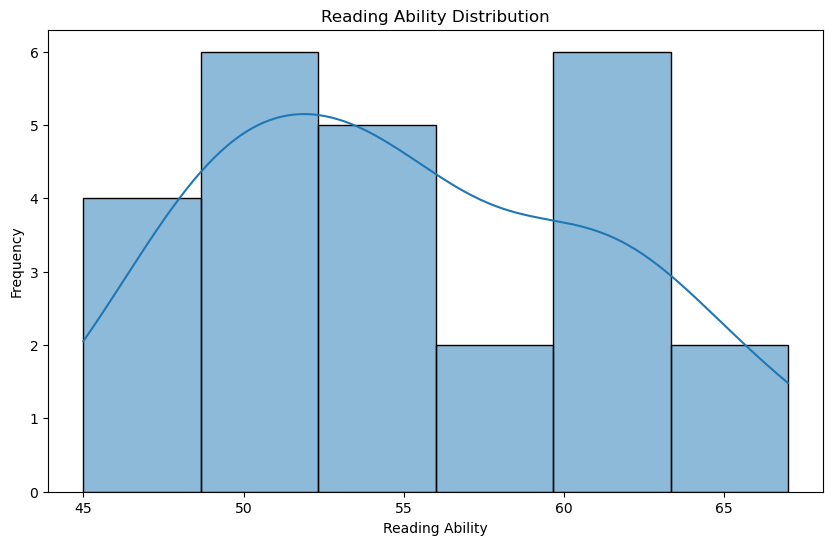

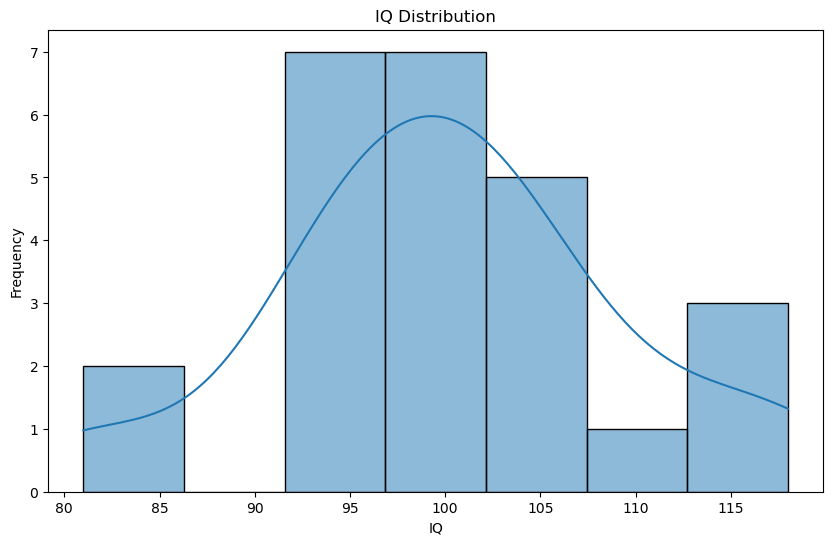

In [19]:
# Q1c (code):
# Check data distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_mh['Abil'], kde=True)
plt.title('Reading Ability Distribution')
plt.xlabel('Reading Ability')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_mh['IQ'], kde=True)
plt.title('IQ Distribution')
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.show()





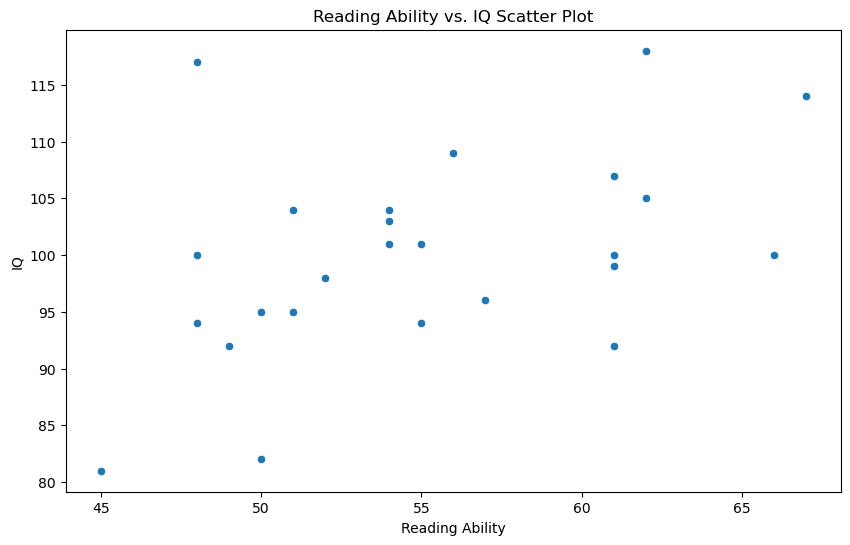

In [21]:
# Q1d (code):
# Scatter plot
plt.figure(figsize=(10, 6))  
sns.scatterplot(x='Abil', y='IQ', data=df_mh)  
plt.title('Reading Ability vs. IQ Scatter Plot')
plt.xlabel('Reading Ability')
plt.ylabel('IQ') 
plt.show()



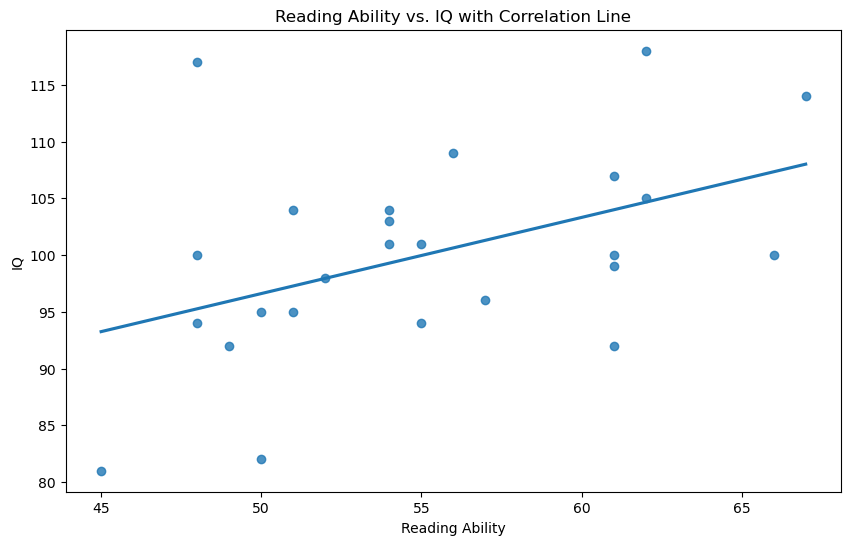

In [22]:
# Q1e (code):
# Correlation line
plt.figure(figsize=(10, 6)) 
sns.regplot(x='Abil', y='IQ', data=df_mh, ci=None)
plt.title('Reading Ability vs. IQ with Correlation Line') 
plt.xlabel('Reading Ability')
plt.ylabel('IQ')
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [ ]:
# Q2a (answer with words):
#Given that the plot shows a linear trend, we would use the Pearson correlation coefficient, because the result show that they are a linear trend.

In [25]:
# Q2b (code):
import scipy.stats as stats

pearson_corr, p_value = stats.pearsonr(df_mh['Abil'], df_mh['IQ'])

print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: 0.4511699387650761
P-value: 0.02359260883361456


In [ ]:
# Q2c (answer with words):
# The Pearson Correlation Coefficient of 0.451 suggests a moderate positive linear relationship between Reading Ability and IQ. This means that as Reading Ability increases, IQ scores also tend to increase, and vice versa.
# The p-value of approximately 0.024 is less than the conventional threshold of 0.05, which suggests that the correlation observed is statistically significant. 

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [ ]:
# Q3a (answer in words):
# H0:There is no association between reading ability and the frequency of reading at home. 
# H1:There is an association between reading ability and the frequency of reading at home.

In [26]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data manipulation and analysis
from scipy.stats import chi2_contingency ##used for performing the chi-square test

# Define the rounded average for Reading Ability and Home
avg_abil = round(df_mh['Abil'].mean())
avg_home = round(df_mh['Home'].mean())

# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'High' if x > avg_abil else 'Low')

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'Frequent' if x > avg_home else 'Infrequent')

In [27]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])
contingency_matrix


Rank_Home,Frequent,Infrequent
Rank_Abil,,
High,8,2
Low,3,12


In [28]:
# Q3d (code):
# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_matrix)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n {expected}")


Chi-square statistic: 6.500270562770561
P-value: 0.010785807794066234
Degrees of freedom: 1
Expected frequencies:
 [[4.4 5.6]
 [6.6 8.4]]


In [29]:
# Q3e (answer in words):
#Given that the p-value is less than 0.05, we reject the null hypothesis, which stated that there is no association between reading ability (low vs. high) and the frequency of reading at home (infrequent vs. frequent). Therefore, we conclude that there is a statistically significant association between reading ability and how frequently people read at home. 

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [30]:

import pandas as pd # used for ...
from scipy import stats #
import numpy as np #
import matplotlib.pyplot as plt ##
import seaborn as sns #

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [31]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_dev_age = df_evaluators['age'].std()

print(f"Mean Age: {mean_age}")
print(f"Standard Deviation of Age: {std_dev_age}")

Mean Age: 30.852941176470587
Standard Deviation of Age: 6.238358141327351


In [32]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females
sex_counts = df_evaluators['sex'].value_counts()
num_males = sex_counts.get(1, 0)  # Get count for males, default to 0 if not present
num_females = sex_counts.get(2, 0)  # Get count for females, default to 0 if not present

print(f"Number of Male Evaluators: {num_males}")
print(f"Number of Female Evaluators: {num_females}")

Number of Male Evaluators: 4
Number of Female Evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [33]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [40]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
intellect_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = intellect_ratings.groupby('eval_id')['Rating'].mean().reset_index()


# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings], ignore_index=True)


# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [ ]:
# Q6a (answer in words):
# Null hypothesis:There is no significant difference in the mean ratings (Intellect, Hire, Impression) between evaluators who listened to pitches and those who read pitches.

# Alternative hypothesis:There is a significant difference in the mean ratings (Intellect, Hire, Impression) between evaluators who listened to pitches and those who read pitches.

# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [ ]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
# the hypothesis suggests we are interested in whether there is any significant difference in ratings between the two conditions (listened vs. read) without specifying the direction of the difference,two-tailed t-test is the appropriate choice

In [ ]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
# The independent variable is whether evaluators listened to or read the resume pitches
# The dependent variables are the overall ratings given by the evaluators, specifically ratings for Intellect, Hire, and Impression.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [45]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for carry out the analysis

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = {}
for category in ['intellect', 'impression', 'hire']:
    for condition in ['listened', 'read']:
        ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == condition)]['Rating']
        shapiro_results[f'{category}_{condition}'] = shapiro(ratings)

# Test for homogeneity of variances (Levene's test)
levene_results = {}
for category in ['intellect', 'impression', 'hire']:
    listened_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    read_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    levene_results[category] = levene(listened_ratings, read_ratings)

# Independent t-tests
ttest_results = {}
for category in ['intellect', 'impression', 'hire']:
    listened_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating']
    read_ratings = ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating']
    ttest_results[category] = ttest_ind(listened_ratings, read_ratings)

ratings_desc, shapiro_results, levene_results, ttest_results

(                      count      mean       std       min       25%       50%  \
 Category   condition                                                            
 hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
            read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
 impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
            read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
 intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
            read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   
 
                            75%       max  
 Category   condition                      
 hire       listened   7.000000  8.000000  
            read       4.000000  7.000000  
 impression listened   7.333333  8.666667  
            read       5.333333  7.333333  
 intellect  listened   6.000000  9.000000  
            read       4.666667  7

Q7b (answer in words):

**Descriptive Statistics:**

- Hire: Listeners gave higher mean ratings (4.71) compared to readers (2.89).

- Impression: Listeners rated higher on average (5.97) than readers (4.07).

- Intellect: Similarly, listeners rated higher (5.63) than readers (3.65).

**Shapiro-Wilk Test for Normality:**

- The result indicate that all groups (intellect, impression, hire;  both listened and read conditions) do not significantly deviate from normal distribution (p > 0.05), suggesting the assumption of normality is met for these data.
   
**Levene's Test for Homogeneity of Variances:**
   
- Results show p-values greater than 0.05 for intellect, impression, and hire categories, indicating no significant difference in variances between listeners and readers.  This suggests the assumption of homogeneity of variances is met.
   
**Independent t-Tests:**
- Intellect: Significant difference (p = 0.0011), listeners rated higher.
- Impression: Significant difference (p = 0.0071), listeners rated higher.
- Hire: Significant difference (p = 0.0127), listeners rated higher.

In summary, the statistical analyses support the conclusion that there are significant differences in ratings between listeners and readers across all tested categories, with listeners consistently giving higher ratings.

